Reference: https://www.coursera.org/learn/linear-regression-numpy-python

This was a free guided project provided through coursera. Please check out, complete and leave a good review at original reference if you have found this project helpful.

This project is separated into the following sections:

1. Importing necessary libraries and loading the data
2. Visualizing the data
3. Understanding and computing the cost function of linear regression
4. Understanding gradient descent and how to minimize cost function using this technique.
5. Visualizing the cost function
6. Plotting the convergence of gradient descent.
7. Training a linear regression model to fit the data
8. Predicting output using the trained model

### Section 1 : Importing Libraries and Loading Data
---

In [3]:
# Data Processing and Computation Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Setting Global Plot Style
sns.set()
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline

Here we will use pandas to read a text file containing some precollected data. CSV(Comma Seperated Values) more appropriately indicates the inner structure of the data instead of a file extension name. If we inspect the text file we will see that the data is separated by commas, which allows us to read this .txt file as a CSV file using pandas.

Using the type() function of python reveals that the df variable we have used to store our loaded data has the class 'pandas.core.frame.DataFrame', which simply means that it is a DataFrame object. 

In [5]:
df = pd.read_csv("bike_sharing_data.txt")

print(type(df))

# Only to ensure that output shows up on github
print(str(type(df)).replace("<","").replace(">",""))

# Jupyter notebook provides display() function for richer outputs compared to print()
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
class 'pandas.core.frame.DataFrame'


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


The DataFrame class provides a huge collection of builtin methods and attributes to make data analysis easier. One of the methods we use below is DataFrame.info(), which gives us a simple yet important overview of the DataFrame object.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


From the above output we can see that we have two columns in our dataset. One is 'Population' and the other is 'Profit'. There are a total of 97 samples in our dataset both columns contain data of type 'float64'. Furthermore, there are no 'null' values in any of the columns, which means we will not have to process this dataset before working on it.

### Section 2 : Visualizing the dataset
---

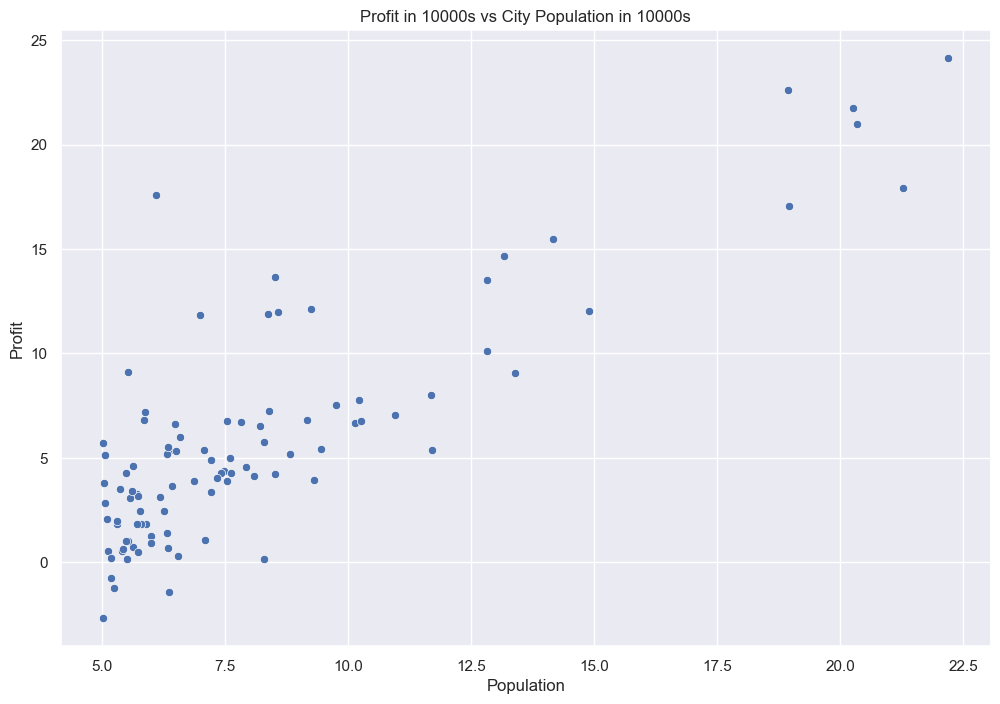

In [7]:
sns.scatterplot(x="Population", y="Profit", data=df)
plt.title("Profit in 10000s vs City Population in 10000s")
plt.show()

The scatter plot reveals that there is an almost linear relation between population and profit, which implies that we may be able to get good predictions by training a linear regression model on this dataset.

### Section 3 : Cost Function
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$